<a href="https://colab.research.google.com/github/isacprogram/Projeto-EBAC/blob/main/Mod9_exercicio_ebacipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [ ]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [ ]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

In [63]:
sinasc_raw.CODMUNNASC

0        110001
1        110001
2        110001
3        110001
4        110001
          ...  
27023    510340
27024    510675
27025    510787
27026    510787
27027    510792
Name: CODMUNNASC, Length: 27028, dtype: int64

In [ ]:
lat_abaixo_10 = sinasc_raw[sinasc_raw['munResLat'] > -10.5 ]
lat_acima_10  = sinasc_raw[sinasc_raw['munResLat'] <= -10.5 ]

In [ ]:
lat_abaixo_10.head(3)

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
72,1,6663834.0,110002,1,29,2.0,12 anos ou mais,999992.0,0.0,0.0,...,5,73,ATIVO,MUNIC,Ariquemes,Rondônia,-9.90846,-63.03327,139.0,4426.571
73,1,6663834.0,110002,1,25,2.0,12 anos ou mais,999992.0,0.0,0.0,...,5,74,ATIVO,MUNIC,Cujubim,Rondônia,-9.37819,-62.58717,111.0,3863.943
74,1,2515601.0,110002,1,35,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,75,ATIVO,MUNIC,Ariquemes,Rondônia,-9.90846,-63.03327,139.0,4426.571


In [ ]:
lat_acima_10.head(3)

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [ ]:
lat_abaixo_10.groupby('munResNome')['IDADEPAI'].describe()

,count,mean,std,min,25%,50%,75%,max
munResNome,,,,,,,,
Alto Paraíso,6.0,28.833333,10.284292,21.0,23.25,25.5,28.50,49.0
Ariquemes,15.0,32.466667,8.609519,20.0,27.50,29.0,38.00,51.0
Buritis,64.0,30.812500,8.988308,18.0,24.00,28.5,37.25,49.0
Cacaulândia,6.0,36.333333,7.966597,28.0,32.00,33.5,39.50,50.0
Candeias do Jamari,19.0,29.894737,5.924476,21.0,25.00,30.0,33.50,41.0
Cujubim,10.0,31.400000,9.489175,19.0,21.75,34.5,39.00,44.0
Itapuã do Oeste,8.0,42.500000,13.887301,25.0,36.00,40.0,44.50,73.0
Jaru,142.0,32.197183,7.530778,19.0,27.00,31.0,36.00,62.0
Machadinho D'Oeste,104.0,31.326923,8.258496,17.0,24.75,31.0,37.00,53.0


In [ ]:
lat_acima_10.groupby('munResNome')['IDADEPAI'].describe()

,count,mean,std,min,25%,50%,75%,max
munResNome,,,,,,,,
Alta Floresta D'Oeste,308.0,29.548701,7.070209,17.0,24.00,28.5,33.00,58.0
Alto Alegre dos Parecis,134.0,29.179104,7.325772,16.0,23.25,28.0,33.75,50.0
Alvorada D'Oeste,103.0,30.757282,7.910611,17.0,25.00,31.0,36.00,52.0
Cabixi,6.0,34.333333,9.201449,19.0,32.00,35.5,37.50,47.0
Cacoal,1262.0,30.931854,7.789058,17.0,25.00,30.0,35.00,66.0
Campo Novo de Rondônia,30.0,30.500000,5.963972,21.0,26.00,29.5,36.00,40.0
Castanheiras,28.0,30.392857,6.843972,17.0,26.50,31.5,35.00,43.0
Cerejeiras,72.0,31.652778,7.189898,19.0,26.00,32.0,35.00,52.0
Chupinguaia,27.0,29.629630,6.929026,20.0,23.50,29.0,34.50,46.0


### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [ ]:
abaixo_3000 = sinasc_raw[sinasc_raw['munResArea'] <= 3000]

acima_3000 = sinasc_raw[sinasc_raw['munResArea'] > 3000]

In [ ]:
acima_3000.groupby('ESCMAE')['ESTCIVMAE'].value_counts()

ESCMAE           ESTCIVMAE
1 a 3 anos       1.0           179
                 5.0           147
                 2.0           100
                 4.0             7
12 anos ou mais  2.0          2587
                 1.0          1084
                 5.0           812
                 4.0           110
                 9.0            18
                 3.0             5
4 a 7 anos       1.0          1598
                 5.0          1387
                 2.0           840
                 4.0            33
                 9.0            18
                 3.0            11
8 a 11 anos      1.0          4651
                 2.0          3964
                 5.0          3453
                 4.0           189
                 9.0            68
                 3.0            21
Nenhuma          1.0            14
                 5.0            11
                 2.0             7
                 9.0             1
Name: ESTCIVMAE, dtype: int64

In [ ]:
acima_3000.groupby('ESCMAE')['ESTCIVMAE'].aggregate([sum,np.median,max])

,sum,median,max
ESCMAE,,,
1 a 3 anos,1142.0,2.0,5.0
12 anos ou mais,10935.0,2.0,9.0
4 a 7 anos,10540.0,2.0,9.0
8 a 11 anos,31275.0,2.0,9.0
Nenhuma,92.0,2.0,9.0


### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [ ]:
sinasc_raw.munResAlt.median()

153.0

In [ ]:
alt_acima = sinasc_raw[sinasc_raw['munResAlt'] < 153.0]
alt_abaixo = sinasc_raw[sinasc_raw['munResAlt'] >= 153.0]

In [ ]:
print(alt_acima.shape)
alt_abaixo.shape

(13039, 69)


(13988, 69)

In [ ]:
alt_acima.groupby('ESTCIVMAE')['CONSULTAS'].describe()

,count,mean,std,min,25%,50%,75%,max
ESTCIVMAE,,,,,,,,
1.0,5125.0,3.236878,1.025288,1.0,3.0,3.0,4.0,9.0
2.0,3900.0,3.520769,0.885800,1.0,3.0,4.0,4.0,9.0
3.0,23.0,3.608696,0.499011,3.0,3.0,4.0,4.0,4.0
4.0,154.0,3.428571,0.877140,1.0,3.0,4.0,4.0,4.0
5.0,3573.0,3.516933,0.748314,1.0,3.0,4.0,4.0,9.0
9.0,66.0,3.424242,0.785652,1.0,3.0,4.0,4.0,4.0


### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

<Axes: xlabel='DTNASC', ylabel='IDADE DAS MÃES AO LONGO DO TEMPO'>

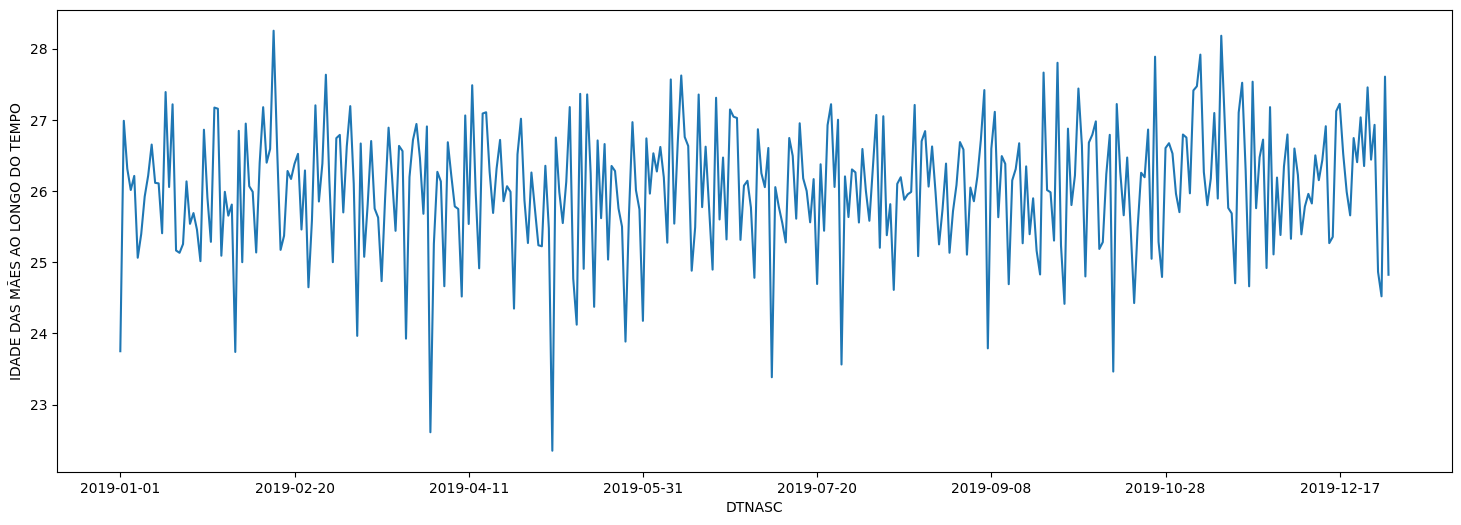

In [74]:
sinasc_raw.groupby('DTNASC')['IDADEMAE'].mean().plot(figsize=[18,6],ylabel='IDADE DAS MÃES AO LONGO DO TEMPO')

In [75]:
sinasc3 = sinasc_raw.set_index('munResNome')

mapping = {
    'Candeias do Jamari': 'Porto Velho',
    'Guajará-Mirim': 'Porto Velho',
    'Itapuã do Oeste': 'Porto Velho',
    'Nova Mamoré': 'Porto Velho',
    'Porto Velho': 'Porto Velho',
    'Alto Paraíso': 'Ariquemes',
    'Ariquemes': 'Ariquemes',
    'Buritis': 'Ariquemes',
    'Cacaulândia': 'Ariquemes',
    'Campo Novo de Rondônia': 'Ariquemes',
    'Cujubim': 'Ariquemes',
    'Monte Negro': 'Ariquemes',
    'Rio Crespo': 'Ariquemes',
    'Governador Jorge Teixeira': 'Jaru',
    'Jaru': 'Jaru',
    'Machadinho d''Oeste': 'Jaru',
    'Theobroma': 'Jaru',
    'Vale do Anari': 'Jaru',
    'Alvorada d''Oeste': 'Ji-Paraná',
    'Costa Marques': 'Ji-Paraná',
    'Ji-Paraná': 'Ji-Paraná',
    'Mirante da Serra': 'Ji-Paraná',
    'Nova União': 'Ji-Paraná',
    'Ouro Preto do Oeste': 'Ji-Paraná',
    'Presidente Médici': 'Ji-Paraná',
    'São Francisco do Guaporé': 'Ji-Paraná',
    'São Miguel do Guaporé': 'Ji-Paraná',
    'Seringueiras': 'Ji-Paraná',
    'Teixeirópolis': 'Ji-Paraná',
    'Urupá': 'Ji-Paraná',
    'Vale do Paraíso': 'Ji-Paraná',
    'Alta Floresta d''Oeste': 'Cacoal',
    'Alto Alegre dos Parecis': 'Cacoal',
    'Cacoal': 'Cacoal',
    'Castanheiras': 'Cacoal',
    'Espigão d''Oeste': 'Cacoal',
    'Ministro Andreazza': 'Cacoal',
    'Nova Brasilândia d''Oeste': 'Cacoal',
    'Novo Horizonte do Oeste': 'Cacoal',
    'Parecis': 'Cacoal',
    'Pimenta Bueno': 'Cacoal',
    'Primavera de Rondônia': 'Cacoal',
    'Rolim de Moura': 'Cacoal',
    'Santa Luzia d''Oeste': 'Cacoal',
    'São Felipe d''Oeste': 'Cacoal',
    'Cabixi': 'Vilhena',
    'Cerejeiras': 'Vilhena',
    'Chupinguaia': 'Vilhena',
    'Colorado do Oeste': 'Vilhena',
    'Corumbiara': 'Vilhena',
    'Pimenteiras do Oeste': 'Vilhena',
    'Vilhena': 'Vilhena'
}

sinasc3.groupby(mapping)['IDADEMAE'].mean()

munResNome
Ariquemes      25.459635
Cacoal         26.434757
Jaru           25.805579
Ji-Paraná      26.108682
Porto Velho    26.166303
Vilhena        26.417143
Name: IDADEMAE, dtype: float64

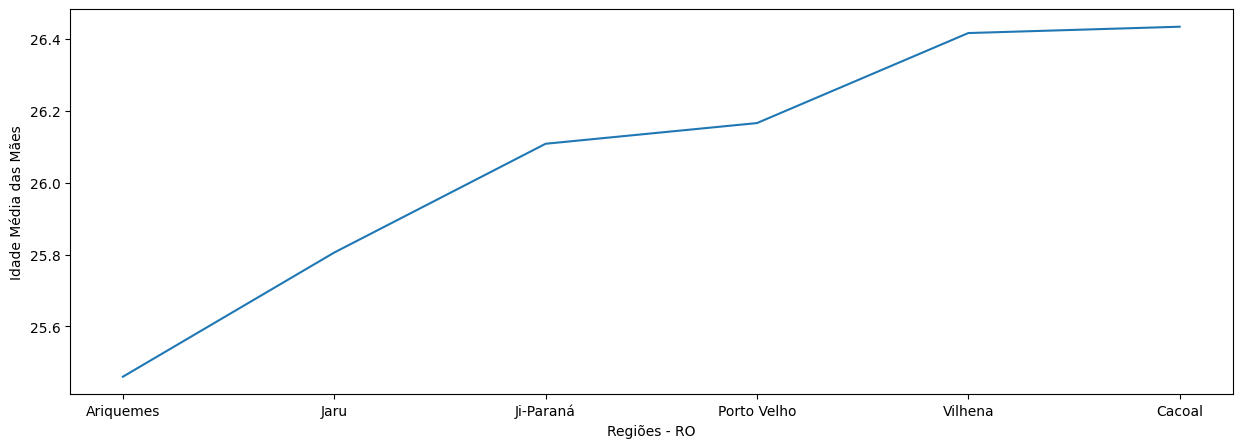

In [76]:
sinasc3.groupby(mapping)['IDADEMAE'].mean().sort_values().plot(figsize = [15,5])

plt.ylabel('Idade Média das Mães');
plt.xlabel('Regiões - RO');


### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [77]:
mapping = {'Porto Velho': 'IDH-M alto', 'Vilhena': 'IDH-M alto', 'Cacoal': 'IDH-M alto', 'Ji-Paraná': 'IDH-M alto', 'Pimenta Bueno': 'IDH-M alto', 'Ariquemes': 'IDH-M alto', 'Rolim de Moura': 'IDH-M alto', 'Cerejeiras': 'IDH-M médio', 'Jaru': 'IDH-M médio', 'Colorado do Oeste': 'IDH-M médio', 'Ouro Preto do Oeste': 'IDH-M médio', 'Espigão d''Oeste': 'IDH-M médio', 'Santa Luzia d''Oeste': 'IDH-M médio', 'Pimenteiras do Oeste': 'IDH-M médio', 'Presidente Médici': 'IDH-M médio', 'Castanheiras': 'IDH-M médio', 'Guajará-Mirim': 'IDH-M médio', 'Chupinguaia': 'IDH-M médio', 'Cabixi': 'IDH-M médio', 'Candeias do Jamari': 'IDH-M médio', 'São Felipe d''Oeste': 'IDH-M médio', 'Cacaulândia': 'IDH-M médio', 'São Miguel do Guaporé': 'IDH-M médio', 'Mirante da Serra': 'IDH-M médio', 'Alvorada d''Oeste': 'IDH-M médio', 'Teixeirópolis': 'IDH-M médio', 'Nova Brasilândia d''Oeste': 'IDH-M médio', 'Rio Crespo': 'IDH-M médio', 'Primavera de Rondônia': 'IDH-M médio', 'Alta Floresta d''Oeste': 'IDH-M médio', 'Ministro Andreazza': 'IDH-M médio', 'Novo Horizonte do Oeste': 'IDH-M médio', 'Vale do Paraíso': 'IDH-M médio', 'Alto Paraíso': 'IDH-M médio', 'Parecis': 'IDH-M médio', 'Buritis': 'IDH-M médio', 'Itapuã do Oeste': 'IDH-M médio', 'Corumbiara': 'IDH-M médio', 'Cujubim': 'IDH-M médio', 'Costa Marques': 'IDH-M médio', 'São Francisco do Guaporé': 'IDH-M médio', 'Urupá': 'IDH-M médio', 'Monte Negro': 'IDH-M médio', 'Seringueiras': 'IDH-M baixo', 'Governador Jorge Teixeira': 'IDH-M baixo', 'Machadinho d''Oeste': 'IDH-M baixo', 'Campo Novo de Rondônia': 'IDH-M baixo', 'Alto Alegre dos Parecis': 'IDH-M baixo', 'Theobroma': 'IDH-M baixo', 'Nova União': 'IDH-M baixo', 'Nova Mamoré': 'IDH-M baixo', 'Vale do Anari': 'IDH-M baixo'}

sinasc3.groupby(mapping)['IDADEMAE'].mean().sort_values()

munResNome
IDH-M baixo    25.269231
IDH-M médio    25.848191
IDH-M alto     26.280332
Name: IDADEMAE, dtype: float64

### 5.2 IFDM
/6/B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


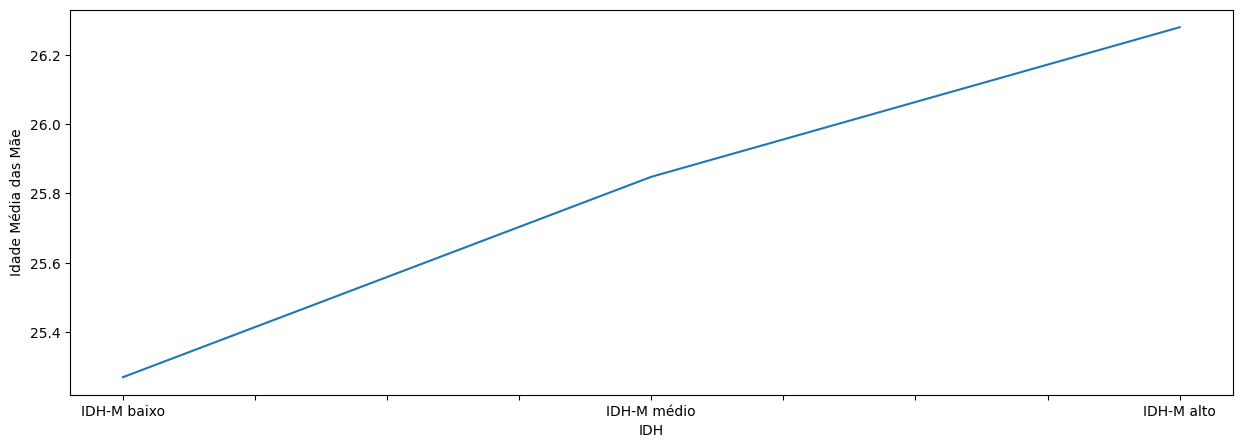

In [78]:
sinasc3.groupby(mapping)['IDADEMAE'].mean().sort_values().plot(figsize = [15,5])

plt.ylabel('Idade Média das Mãe')
plt.xlabel('IDH');

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [79]:
mapping = {'Ariquemes': 'Desenvolvimento moderado', 'Vilhena': 'Desenvolvimento moderado', 'Pimenta Bueno': 'Desenvolvimento moderado', 'Porto Velho': 'Desenvolvimento moderado', 'Ji-Paraná': 'Desenvolvimento moderado', 'Cacoal': 'Desenvolvimento moderado', 'Santa Luzia d''Oeste': 'Desenvolvimento moderado', 'Rolim de Moura': 'Desenvolvimento moderado', 'Chupinguaia': 'Desenvolvimento moderado', 'São Miguel do Guaporé': 'Desenvolvimento moderado', 'Pimenteiras do Oeste': 'Desenvolvimento moderado', 'Teixeirópolis': 'Desenvolvimento moderado', 'Colorado do Oeste': 'Desenvolvimento moderado', 'Jaru': 'Desenvolvimento moderado', 'Rio Crespo': 'Desenvolvimento moderado', 'Primavera de Rondônia': 'Desenvolvimento moderado', 'Alta Floresta d''Oeste': 'Desenvolvimento moderado', 'Ouro Preto do Oeste': 'Desenvolvimento moderado', 'São Francisco do Guaporé': 'Desenvolvimento moderado', 'Candeias do Jamari': 'Desenvolvimento moderado', 'Buritis': 'Desenvolvimento moderado', 'São Felipe d''Oeste': 'Desenvolvimento moderado', 'Presidente Médici': 'Desenvolvimento moderado', 'Cerejeiras': 'Desenvolvimento moderado', 'Monte Negro': 'Desenvolvimento moderado', 'Urupá': 'Desenvolvimento moderado', 'Espigão d''Oeste': 'Desenvolvimento regular', 'Seringueiras': 'Desenvolvimento regular', 'Alvorada d''Oeste': 'Desenvolvimento regular', 'Itapuã do Oeste': 'Desenvolvimento regular', 'Cabixi': 'Desenvolvimento regular', 'Novo Horizonte do Oeste': 'Desenvolvimento regular', 'Nova Brasilândia d''Oeste': 'Desenvolvimento regular', 'Vale do Paraíso': 'Desenvolvimento regular', 'Corumbiara': 'Desenvolvimento regular', 'Alto Paraíso': 'Desenvolvimento regular', 'Cacaulândia': 'Desenvolvimento regular', 'Vale do Anari': 'Desenvolvimento regular', 'Ministro Andreazza': 'Desenvolvimento regular', 'Costa Marques': 'Desenvolvimento regular', 'Nova União': 'Desenvolvimento regular', 'Guajará-Mirim': 'Desenvolvimento regular', 'Mirante da Serra': 'Desenvolvimento regular', 'Parecis': 'Desenvolvimento regular', 'Castanheiras': 'Desenvolvimento regular', 'Theobroma': 'Desenvolvimento regular', 'Machadinho d''Oeste': 'Desenvolvimento regular', 'Campo Novo de Rondônia': 'Desenvolvimento regular', 'Nova Mamoré': 'Desenvolvimento regular', 'Cujubim': 'Desenvolvimento regular', 'Alto Alegre dos Parecis': 'Desenvolvimento regular', 'Governador Jorge Teixeira': 'Desenvolvimento regular'}

sinasc3.groupby(mapping)['IDADEMAE'].mean().sort_values()

munResNome
Desenvolvimento regular     25.412005
Desenvolvimento moderado    26.226921
Name: IDADEMAE, dtype: float64

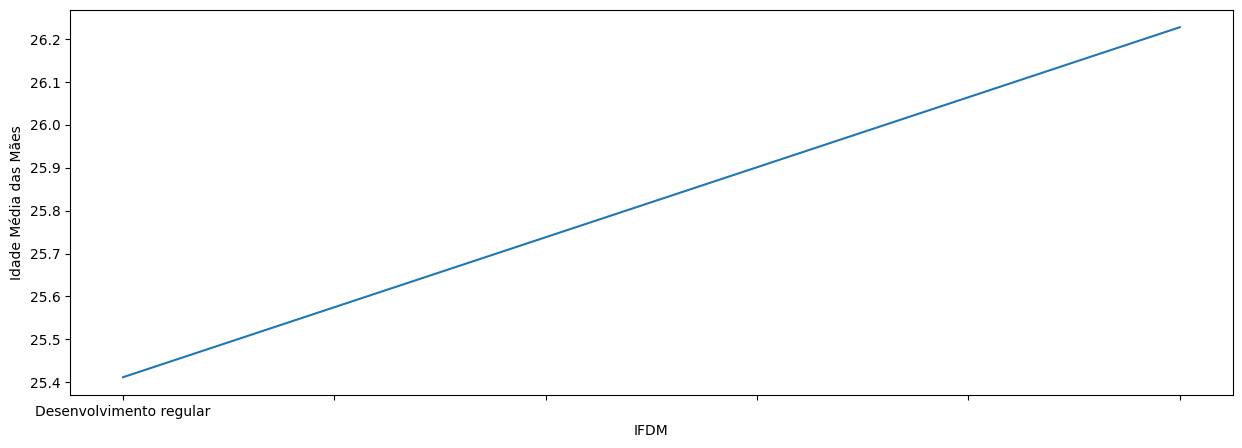

In [80]:
sinasc3.groupby(mapping)['IDADEMAE'].mean().sort_values().plot(figsize = [15,5])

plt.ylabel('Idade Média das Mães')
plt.xlabel('IFDM');


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.